<a href="https://colab.research.google.com/github/Yinwenxu-1212/Deep_learning_learning/blob/main/RL4CO/1-quickstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RL4CO Quickstart Notebook

<a href="https://colab.research.google.com/github/ai4co/rl4co/blob/main/examples/1-quickstart.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

[**Documentation**](https://rl4co.readthedocs.io/) |  [**Getting Started**](https://github.com/ai4co/rl4co/tree/main#getting-started) | [**Usage**](https://github.com/ai4co/rl4co/tree/main#usage) | [**Contributing**](#contributing) | [**Paper**](https://arxiv.org/abs/2306.17100) | [**Citation**](#cite-us)

In this notebook we will train the AttentionModel (AM) on the TSP environment for 20 nodes. On a GPU, this should less than 2 minutes!  🚀

![Alt text](https://user-images.githubusercontent.com/48984123/245925317-0db4efdd-1c93-4991-8f09-f3c6c1f35d60.png)

### Installation

In [2]:
## Uncomment the following line to install the package from PyPI
## You may need to restart the runtime in Colab after this
## Remember to choose a GPU runtime for faster training!

!pip install rl4co

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.6/374.6 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.9/359.9 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 40.5 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144555 sha256=20ff27ff197739a956996f36ac9edbce2a04d

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import torch

from rl4co.envs import TSPEnv
from rl4co.models import AttentionModelPolicy, REINFORCE
from rl4co.utils.trainer import RL4COTrainer

### Environment, Policy and Model

Full documentation of:https://rl4.co/docs/content/api/envs/base/

- Base environment class [here](https://rl4.co/docs/content/api/envs/base/)
- Base policy class [here](https://rl4.co/docs/content/api/networks/base_policies/)
- Base model class [here](https://rl4.co/docs/content/api/rl/base/)

In [2]:
# 定义环境
# TSPEnv：表示旅行商问题（TSP）的环境，它是一个强化学习任务的核心组件。
# generator_params：用于生成 TSP 数据的参数。
# 'num_loc': 50：表示问题中有 50 个位置（城市）
env = TSPEnv(generator_params={'num_loc': 50})

# 定义策略网络
# AttentionModelPolicy：定义了策略网络，使用注意力机制（如 Transformer 的 Encoder-Decoder 结构）来编码 TSP 问题并生成路径。
# env_name=env.name：关联策略网络与环境类型。
# embed_dim=128：节点嵌入的维度（Embedding Dimension），用于表示图中每个位置的特征。
# num_encoder_layers=3：注意力编码器的层数。
# num_heads=8：多头注意力（Multi-Head Attention）的头数。
policy = AttentionModelPolicy(env_name=env.name,
                              embed_dim=128,
                              num_encoder_layers=3,
                              num_heads=8,
                            )

# 定义强化学习模型
# REINFORCE：使用策略梯度方法优化策略的强化学习算法。
# env：环境，用于生成训练样本和评估策略。
# policy：策略网络，用于生成动作。
# baseline="rollout"：使用贪婪策略作为基准（Baseline）来减少策略梯度的方差，提高训练效率。
# batch_size=512：每次训练的批量大小。
# train_data_size=100_000：训练数据的大小。
# val_data_size=10_000：验证数据的大小。
# optimizer_kwargs={"lr": 1e-4}：优化器参数，这里指定学习率为 1e-4。
model = REINFORCE(env,
                    policy,
                    baseline="rollout",
                    batch_size=512,
                    train_data_size=100_000,
                    val_data_size=10_000,
                    optimizer_kwargs={"lr": 1e-4},
                    )

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'env' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['env'])`.
/usr/local/lib/python3.10/dist-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'policy' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['policy'])`.


### Test greedy rollout with untrained model and plot

Problem 1 | Cost: 19.926
Problem 2 | Cost: 19.784
Problem 3 | Cost: 19.198


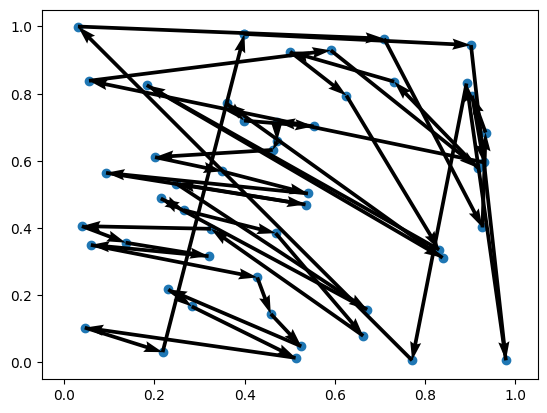

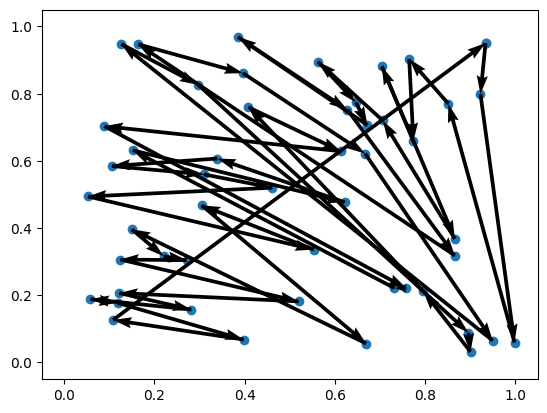

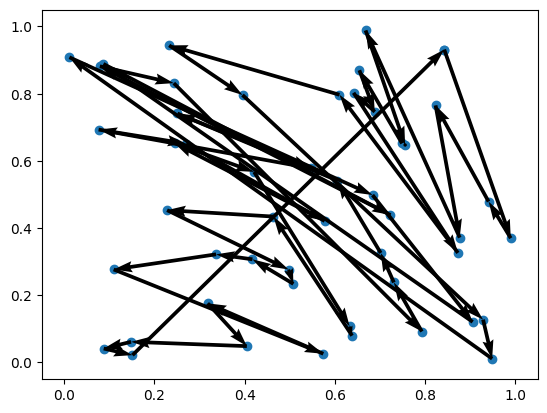

In [3]:
# Greedy rollouts over untrained policy
# 这段代码的目的是在一个未训练的策略上执行贪心（greedy）策略，以评估初始策略的性能，并通过渲染（可视化）展示策略在解决旅行商问题（TSP）时的表现。
# 1.设置设备（CPU 或 GPU）
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 2.重置环境，生成3个 TSP 问题实例，并将数据移动到指定设备上。
# env.reset(batch_size=[3])：重置环境，生成批量大小为 3 的初始数据（即 3 个 TSP 问题，每个有 50 个节点，之前在环境中定义）。
td_init = env.reset(batch_size=[3]).to(device)
# 3.将策略网络 policy 移动到指定设备上，以确保模型和数据在同一设备上进行计算。
policy = policy.to(device)
# 4.执行策略网络，获取动作和奖励
# td_init.clone()：为了避免在原始数据上进行操作，先克隆一份初始数据。
# phase="test"：指定策略网络处于测试阶段，这通常会影响模型的行为，例如关闭 Dropout 等。
# decode_type="greedy"：指定解码类型为贪心策略，这意味着每一步都选择当前认为最优的动作，而不是进行采样。
# return_actions=True：请求策略网络返回所采取的动作序列。
# out 是一个包含策略网络输出的字典，通常包括：
# - 'actions'：策略采取的动作序列（即访问节点的顺序）。
# - 'reward'：对应的奖励（通常是路径长度的负值，因为 TSP 是要最小化路径长度）。
out = policy(td_init.clone(), phase="test", decode_type="greedy", return_actions=True)
# 5.提取动作和奖励，并移动到 CPU
# .detach()：将张量从计算图中分离出来，防止后续的操作影响梯度。
actions_untrained = out['actions'].cpu().detach()
rewards_untrained = out['reward'].cpu().detach()
# 6.可视化每个问题的结果
for i in range(3):
    # 因为在 TSP 中，奖励通常定义为路径长度的负值（为了转换为最大化问题），所以使用 -rewards_untrained[i] 得到实际的路径长度（成本）。
    print(f"Problem {i+1} | Cost: {-rewards_untrained[i]:.3f}")
    # env.render(td_init[i], actions_untrained[i])：使用环境的渲染函数，传入第 i 个问题的初始数据和对应的动作序列，绘制出旅行商问题的路径图。
    env.render(td_init[i], actions_untrained[i])

### Trainer

The RL4CO trainer is a wrapper around PyTorch Lightning's `Trainer` class which adds some functionality and more efficient defaults

In [5]:
# 定义了一个 RL4COTrainer 实例，用于控制强化学习训练的过程。
trainer = RL4COTrainer(
    max_epochs=3,           # 训练的最大轮数
    accelerator="gpu",        # 使用 GPU 加速
    devices=1,             # 使用的设备数量，这里是 1 个 GPU
    logger=None,           # 不启用日志记录器
)

INFO: Using 16bit Automatic Mixed Precision (AMP)
INFO:lightning.pytorch.utilities.rank_zero:Using 16bit Automatic Mixed Precision (AMP)
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


### Fit the model

In [6]:
# 启动模型的训练过程。这一方法会按照 RL4COTrainer 中的配置，管理并执行强化学习模型的训练。
trainer.fit(model)

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name     | Type                 | Params | Mode 
----------------------------------------------------------
0 | env      | TSPEnv               | 0      | train
1 | policy   | AttentionModelPolicy | 710 K  | train
2 | baseline | WarmupBaseline       | 710 K  | train
----------------------------------------------------------
1.4 M     Trainable params
0         Non-trainable params
1.4 M     Total params
5.681     Total estimated model params size (MB)
72     

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=3` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


### Testing

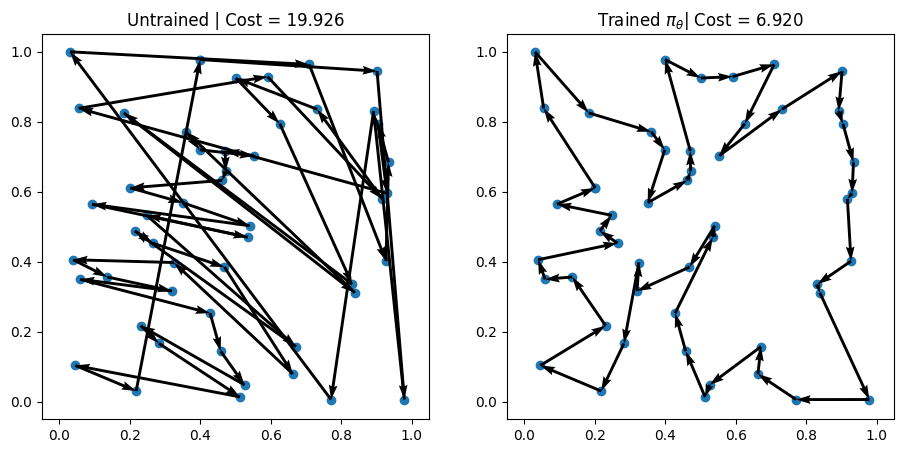

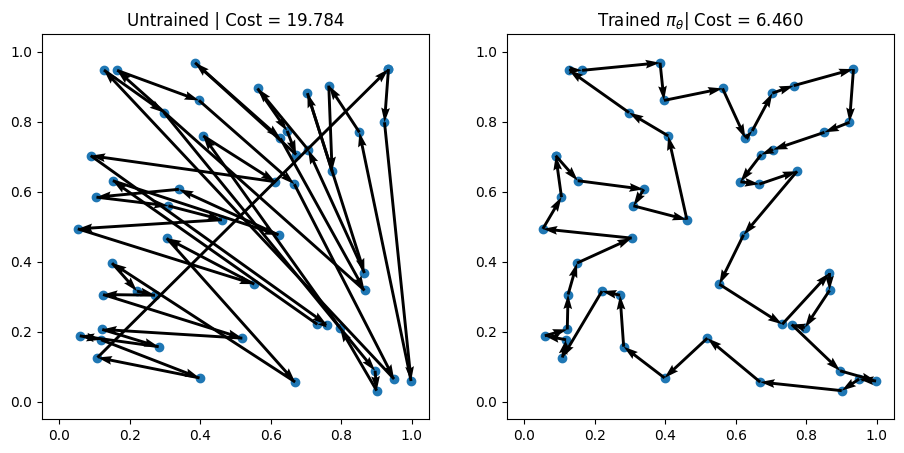

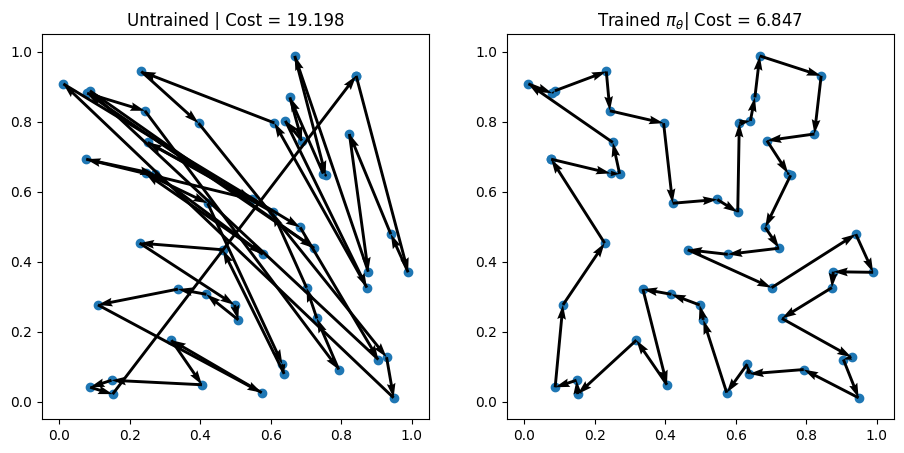

In [7]:
# 对比未训练和训练后的策略在解决同一组 TSP 问题上的表现，并将结果可视化。
# 1.使用训练后的策略生成动作
policy = model.policy.to(device)
out = policy(td_init.clone(), phase="test", decode_type="greedy", return_actions=True)
actions_trained = out['actions'].cpu().detach()

# 2.可视化未训练和训练后的结果
import matplotlib.pyplot as plt
for i, td in enumerate(td_init):
    # fig, axs = plt.subplots(1,2, figsize=(11,5)) 创建一个 1 行 2 列的图，用于同时显示未训练和训练后的结果。
    fig, axs = plt.subplots(1,2, figsize=(11,5))
    # env.render(td, actions_untrained[i], ax=axs[0]) 在第一个子图中绘制未训练策略的路径。
    env.render(td, actions_untrained[i], ax=axs[0])
    # env.render(td, actions_trained[i], ax=axs[1]) 在第二个子图中绘制训练后策略的路径。
    env.render(td, actions_trained[i], ax=axs[1])
    # 设置标题
    axs[0].set_title(f"Untrained | Cost = {-rewards_untrained[i].item():.3f}")
    axs[1].set_title(r"Trained $\pi_\theta$" + f"| Cost = {-out['reward'][i].item():.3f}")

We can see that even after just 3 epochs, our trained AM is able to find much better solutions than the random policy! 🎉

In [8]:
# Optionally, save the checkpoint for later use (e.g. in tutorials/4-search-methods.ipynb)
trainer.save_checkpoint("tsp-quickstart.ckpt")